In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Reading File
df = pd.read_csv('/content/drive/MyDrive/Project: Credit Default Modeling/application_train.csv',encoding='latin1')
pd.set_option('display.max_columns', 121)
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [5]:
# statistical Property of numerical columns
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [6]:
# statistical Property of Object columns
df.describe(include=[object])

,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
count,307511,307511,307511,306219,307511,307511,307511,307511,211120,307511,307511,97216,153214,151170,161756
unique,2,2,2,7,8,5,6,6,18,7,58,4,3,7,2
top,Cash loans,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3,reg oper account,block of flats,Panel,No
freq,278232,202924,213312,248526,158774,218391,196432,272868,55186,53901,67992,73830,150503,66040,159428


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(15)
memory usage: 283.9+ MB


In [8]:
df.shape

(307511, 121)

## Data Preprocessing

In [9]:
pd.set_option('display.max_rows', 121)

In [10]:
# Initial column count
initial_columns_count = df.shape[1]
initial_columns_count

121

In [11]:
# Checking null values and their percentage
def check_null_values(df):
    null_counts = df.isnull().sum()
    null_percentages = (null_counts / len(df)) * 100

    null_stats = pd.DataFrame({
        'Column Name': null_counts.index,
        'Null Count': null_counts.values,
        'Null Percentage': null_percentages.values
    })

    # Filterd out columns with no null values
    null_stats = null_stats[null_stats['Null Count'] > 0]

    # Sorting by null count in descending order
    null_stats = null_stats.sort_values(by='Null Count', ascending=False)
    null_stats.reset_index(drop=True, inplace=True)

    return null_stats

In [12]:
check_null_values(df)

,Column Name,Null Count,Null Percentage
0,COMMONAREA_MEDI,214865,69.872297
1,COMMONAREA_AVG,214865,69.872297
2,COMMONAREA_MODE,214865,69.872297
3,NONLIVINGAPARTMENTS_MEDI,213514,69.432963
4,NONLIVINGAPARTMENTS_MODE,213514,69.432963
5,NONLIVINGAPARTMENTS_AVG,213514,69.432963
6,FONDKAPREMONT_MODE,210295,68.386172
7,LIVINGAPARTMENTS_MODE,210199,68.354953
8,LIVINGAPARTMENTS_MEDI,210199,68.354953
9,LIVINGAPARTMENTS_AVG,210199,68.354953


In [13]:
def drop_columns_with_high_null_percentage(df, threshold=40):

    # Calculating null percentages for each column
    null_percentages = (df.isnull().mean() * 100)

    columns_to_drop = null_percentages[null_percentages > threshold].index

    # Droping columns with high null percentages
    df = df.drop(columns=columns_to_drop)

    return df

df = drop_columns_with_high_null_percentage(df)

In [14]:
# Checking null values and their percentage after dropping almost empty columns
check_null_values(df)

,Column Name,Null Count,Null Percentage
0,OCCUPATION_TYPE,96391,31.345545
1,EXT_SOURCE_3,60965,19.825307
2,AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.501631
3,AMT_REQ_CREDIT_BUREAU_QRT,41519,13.501631
4,AMT_REQ_CREDIT_BUREAU_MON,41519,13.501631
5,AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.501631
6,AMT_REQ_CREDIT_BUREAU_DAY,41519,13.501631
7,AMT_REQ_CREDIT_BUREAU_HOUR,41519,13.501631
8,NAME_TYPE_SUITE,1292,0.420148
9,DEF_60_CNT_SOCIAL_CIRCLE,1021,0.332021


In [15]:
# Columns count after dropping
columns_count_after_dropping = df.shape[1]
columns_count_after_dropping

72

In [16]:
# Droping Unneccessary Columns
df.drop(columns=['SK_ID_CURR','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE',
        'FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_MOBIL',
        'FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9',
        'FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15',
        'FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21',
        'WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START'], inplace=True)

In [17]:
# Filling Null Value Of Numerical Column with mean
def fill_na_with_mean(df, columns):
    for column in columns:
        mean_value = df[column].mean()
        df[column] = df[column].fillna(mean_value)

columns_to_fill = [
    'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
    'EXT_SOURCE_2', 'EXT_SOURCE_3', 'AMT_ANNUITY',
    'AMT_GOODS_PRICE', 'DAYS_LAST_PHONE_CHANGE'
]

fill_na_with_mean(df, columns_to_fill)

In [18]:
# Filling Null Value Of Object Column with mode
def fill_na_with_mode(df, columns):
    for column in columns:
        mode_value = df[column].mode()[0]
        df[column] = df[column].fillna(mode_value)

columns_to_fill = ['OCCUPATION_TYPE', 'NAME_TYPE_SUITE','CNT_FAM_MEMBERS']

fill_na_with_mode(df, columns_to_fill)

In [19]:
# Checking null values after filling with mean and mode
check_null_values(df)

,Column Name,Null Count,Null Percentage


In [20]:
# applying absolute method to handle Negative values
columns = ['DAYS_BIRTH',	'DAYS_EMPLOYED',	'DAYS_REGISTRATION',	'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']
df[columns] = df[columns].abs()

In [21]:
# checking duplicates
df.duplicated().sum()

0

In [22]:
# Final column count
Final_columns_count = df.shape[1]
Final_columns_count

39

In [23]:
new_column_names = [
    'Target', 'Contract_Type','Owns_Car', 'Owns_Realty', 'Children_Count',
    'Total_Income', 'Credit_Amount', 'Annuity_Amount', 'Goods_Price', 'Companion_Type',
    'Income_Type', 'Education_Level', 'Family_Status', 'Housing_Type', 'Region_Population',
    'Birth_Days', 'Employed_Days', 'Registration_Days', 'ID_Publish_Days',  'Job_Type',
    'City_Region_Rating','Family_Size', 'Region_Rating',
    'Reg_Region_Not_Live_Region', 'Reg_Region_Not_Work_Region', 'Live_Region_Not_Work_Region',
    'Reg_City_Not_Live_City', 'Reg_City_Not_Work_City', 'Live_City_Not_Work_City',
    'Organization_Type', 'External_Source_2', 'External_Source_3',
    'Last_Phone_Change_Days', 'Credit_Inquiries_Hour', 'Credit_Inquiries_Day',
    'Credit_Inquiries_Week', 'Credit_Inquiries_Month', 'Credit_Inquiries_Quarter',
    'Credit_Inquiries_Year'
]
# Assigning new column names
df.columns = new_column_names

In [24]:
df.head()

,Target,Contract_Type,Owns_Car,Owns_Realty,Children_Count,Total_Income,Credit_Amount,Annuity_Amount,Goods_Price,Companion_Type,Income_Type,Education_Level,Family_Status,Housing_Type,Region_Population,Birth_Days,Employed_Days,Registration_Days,ID_Publish_Days,Job_Type,City_Region_Rating,Family_Size,Region_Rating,Reg_Region_Not_Live_Region,Reg_Region_Not_Work_Region,Live_Region_Not_Work_Region,Reg_City_Not_Live_City,Reg_City_Not_Work_City,Live_City_Not_Work_City,Organization_Type,External_Source_2,External_Source_3,Last_Phone_Change_Days,Credit_Inquiries_Hour,Credit_Inquiries_Day,Credit_Inquiries_Week,Credit_Inquiries_Month,Credit_Inquiries_Quarter,Credit_Inquiries_Year
0,1,Cash loans,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,2,2,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,1134.0,0.000000,0.000,0.000000,0.000000,0.000000,1.000000
1,0,Cash loans,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,0,0,0,0,0,0,School,0.622246,0.510853,828.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
2,0,Revolving loans,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,2,2,0,0,0,0,0,0,Government,0.555912,0.729567,815.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
3,0,Cash loans,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,Laborers,2.0,2,2,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.510853,617.0,0.006402,0.007,0.034362,0.267395,0.265474,1.899974
4,0,Cash loans,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,Core staff,1.0,2,2,0,0,0,0,1,1,Religion,0.322738,0.510853,1106.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000


## Data Analysis and Visualization

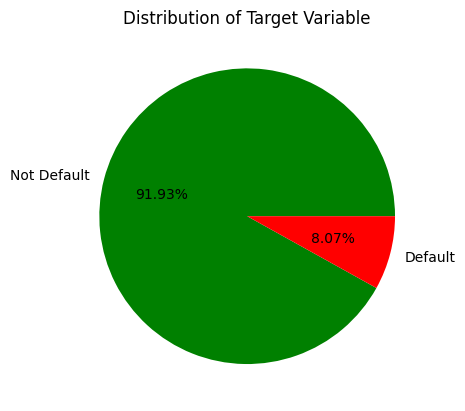

In [25]:
# Displaying the distribution of the target variable
target_mapping = {1: "Default", 0: "Not Default"}
target_names = df["Target"].map(target_mapping)
colors = ["green" if label == "Not Default" else "red" for label in target_names.value_counts().index]

# Pie chart
target_names.value_counts().plot(kind="pie", autopct='%.2f%%', colors=colors)
plt.ylabel("")
plt.title("Distribution of Target Variable")
plt.show()

In [26]:
# showing the relationship between a categorical column and the target column
def plot_and_print_category_analysis(df, target_column, categorical_column):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Heatmap
    cross_tab = pd.crosstab(df[categorical_column], df[target_column])
    sns.heatmap(cross_tab, annot=True, cmap='coolwarm', ax=axes[0], fmt="d")
    axes[0].set_title(f'Heatmap of {categorical_column} vs {target_column}')

    # Calculating defaulter ratios
    defaulter_ratio = df[df[target_column] == 1][categorical_column].value_counts() / df[categorical_column].value_counts() * 100
    ratio_df = defaulter_ratio.reset_index()
    ratio_df.columns = [categorical_column, 'Defaulter_Ratio']

    # Bar Plot with defaulter ratios
    sns.barplot(x=categorical_column, y='Defaulter_Ratio', data=ratio_df, ax=axes[1])
    axes[1].set_title(f'Defaulter Ratio in {categorical_column}')
    axes[1].set_ylabel('Defaulter Ratio (%)')
    axes[1].set_xlabel(categorical_column)
    axes[1].tick_params(axis='x', rotation=60, labelsize=12)
    axes[1].tick_params(axis='y', labelsize=12)

    # Displaying the bar plot with the defaulter ratio
    for p in axes[1].patches:
        height = p.get_height()
        axes[1].annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2., height),
                         ha='center', va='center', fontsize=10, color='black',
                         xytext=(0, 5), textcoords='offset points')

    plt.tight_layout()
    plt.show()
    print(ratio_df)

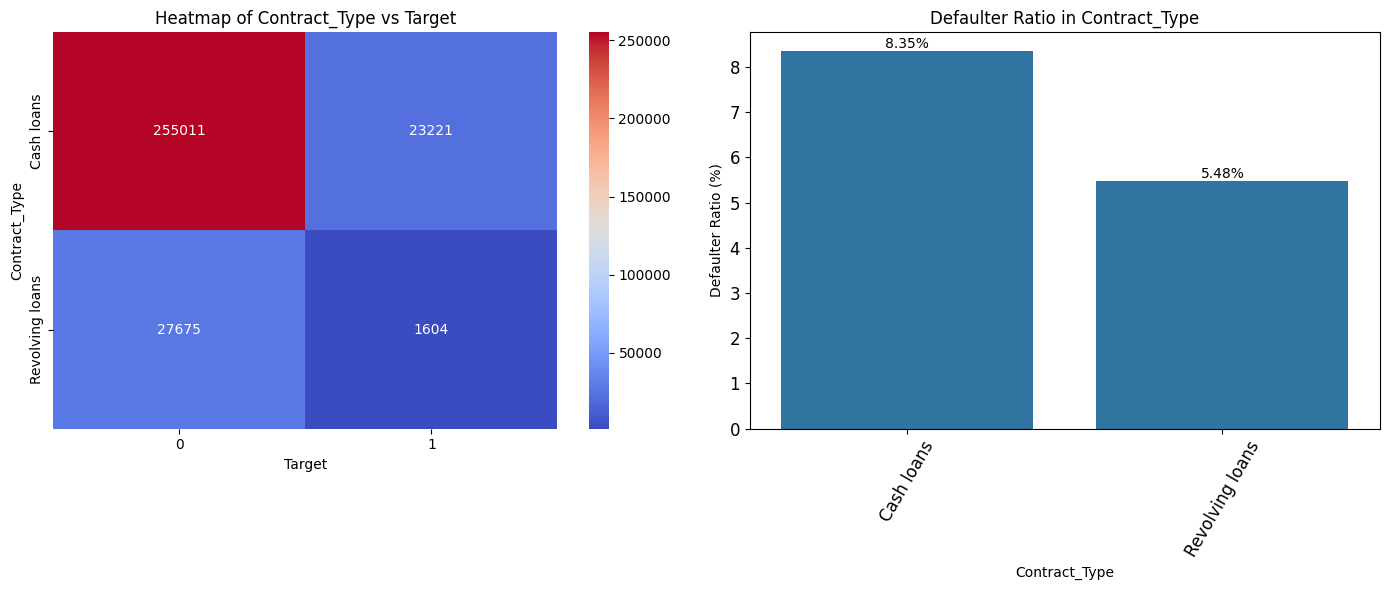

     Contract_Type  Defaulter_Ratio
0       Cash loans         8.345913
1  Revolving loans         5.478329


In [27]:
plot_and_print_category_analysis(df, 'Target', 'Contract_Type')

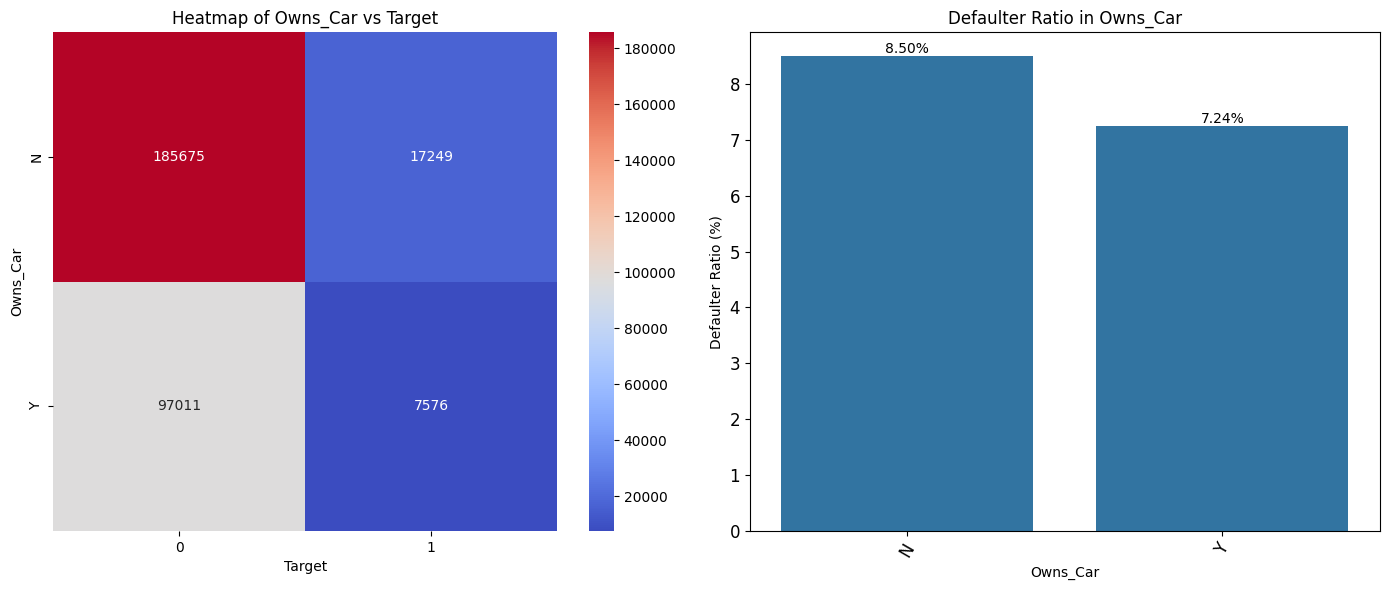

  Owns_Car  Defaulter_Ratio
0        N         8.500227
1        Y         7.243730


In [28]:
plot_and_print_category_analysis(df, 'Target', 'Owns_Car')

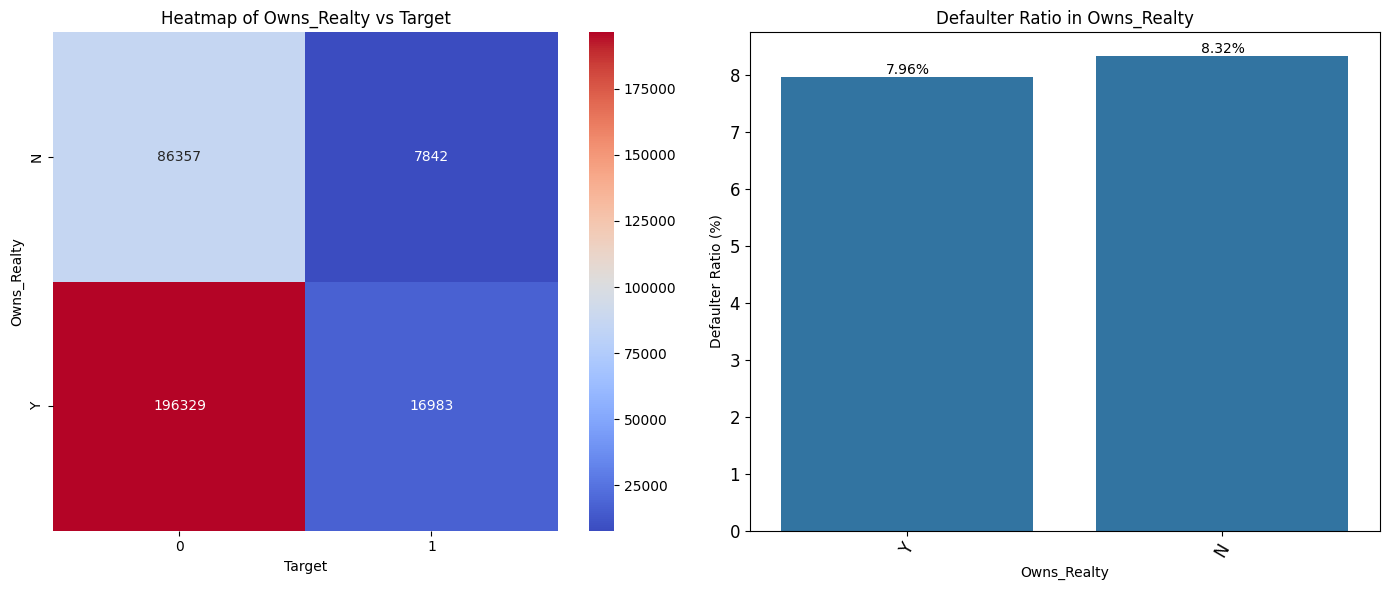

  Owns_Realty  Defaulter_Ratio
0           Y         7.961577
1           N         8.324929


In [29]:
plot_and_print_category_analysis(df, 'Target','Owns_Realty')

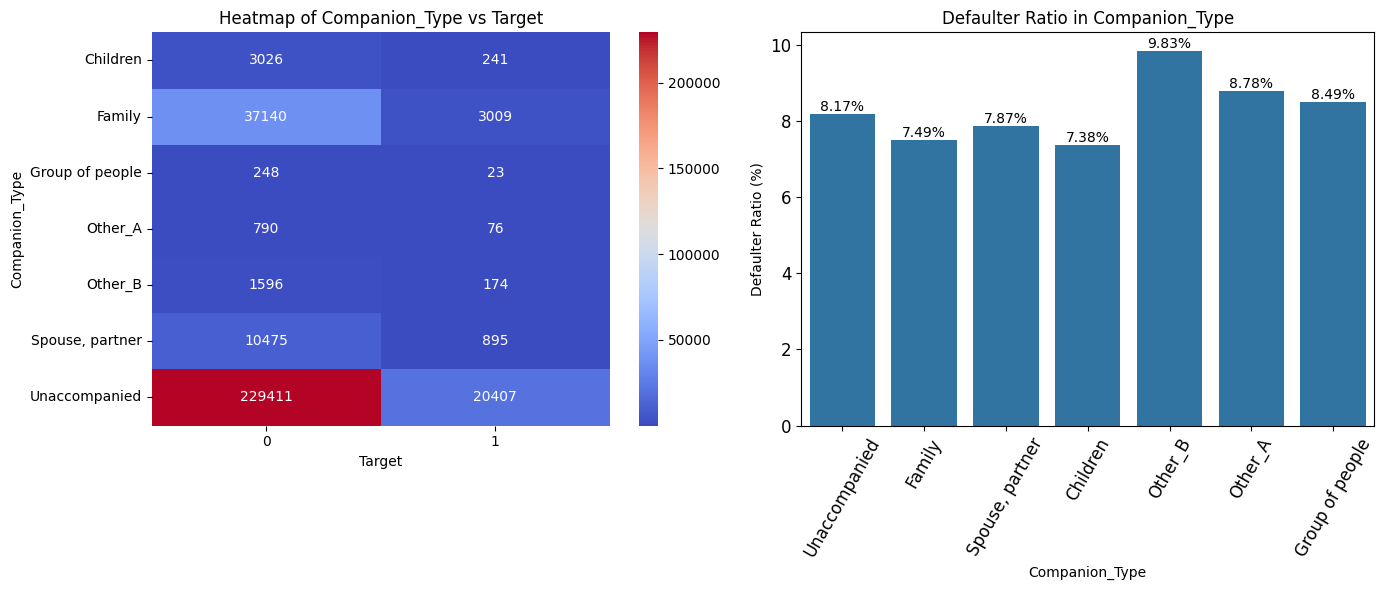

    Companion_Type  Defaulter_Ratio
0    Unaccompanied         8.168747
1           Family         7.494583
2  Spouse, partner         7.871592
3         Children         7.376798
4          Other_B         9.830508
5          Other_A         8.775982
6  Group of people         8.487085


In [30]:
plot_and_print_category_analysis(df, 'Target','Companion_Type')

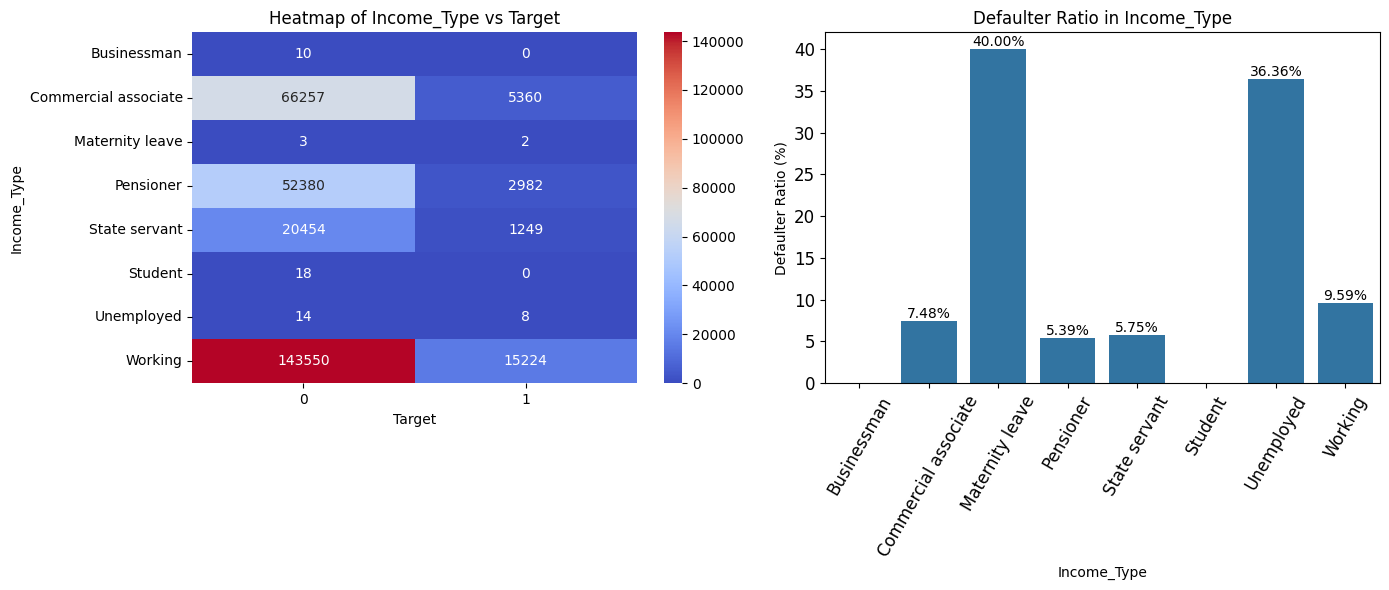

            Income_Type  Defaulter_Ratio
0           Businessman              NaN
1  Commercial associate         7.484257
2       Maternity leave        40.000000
3             Pensioner         5.386366
4         State servant         5.754965
5               Student              NaN
6            Unemployed        36.363636
7               Working         9.588472


In [31]:
plot_and_print_category_analysis(df, 'Target','Income_Type')

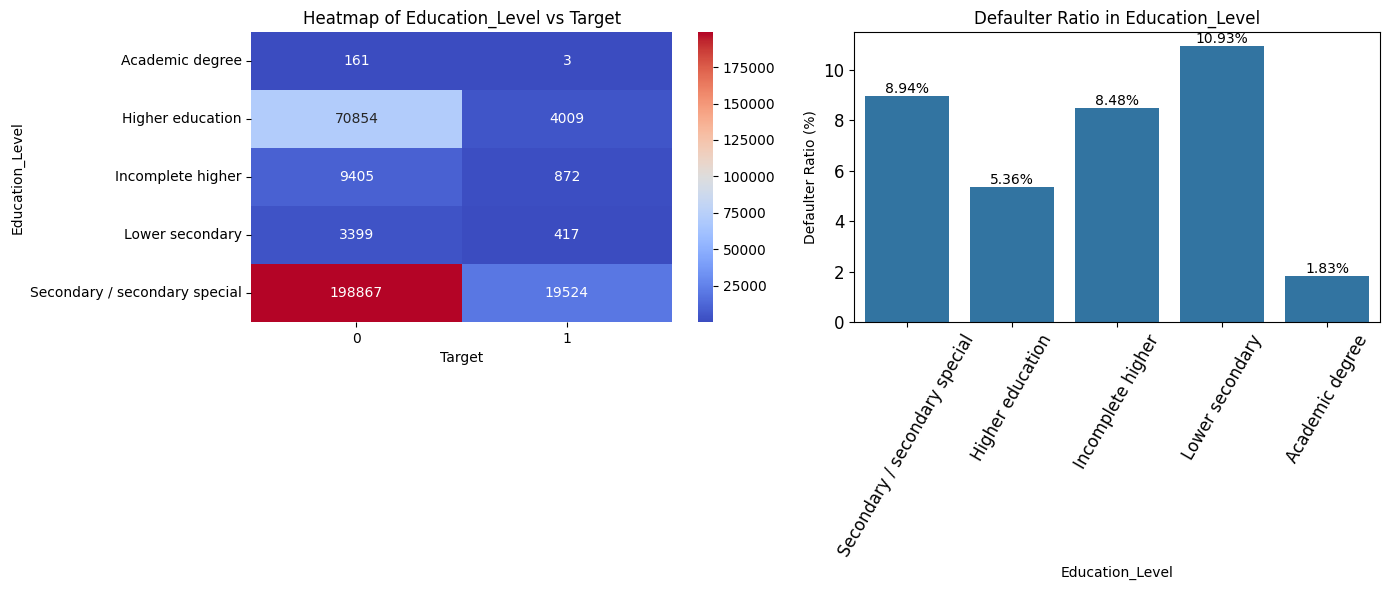

                 Education_Level  Defaulter_Ratio
0  Secondary / secondary special         8.939929
1               Higher education         5.355115
2              Incomplete higher         8.484966
3                Lower secondary        10.927673
4                Academic degree         1.829268


In [32]:
plot_and_print_category_analysis(df, 'Target','Education_Level')

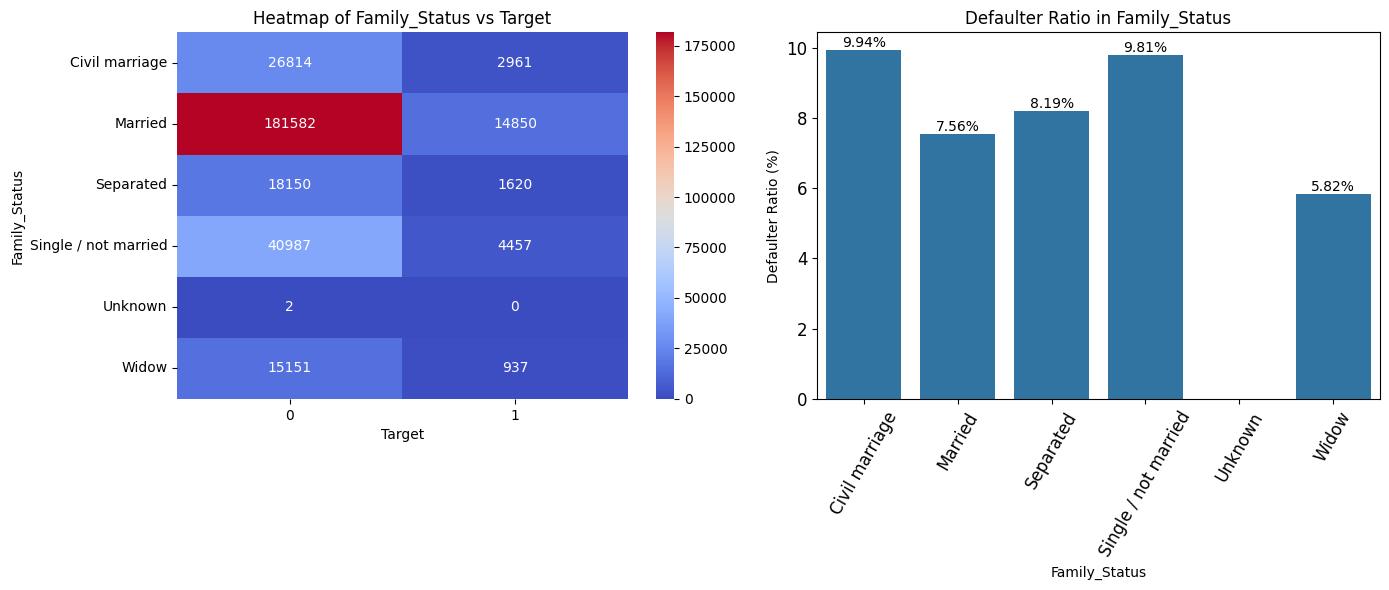

          Family_Status  Defaulter_Ratio
0        Civil marriage         9.944584
1               Married         7.559868
2             Separated         8.194234
3  Single / not married         9.807675
4               Unknown              NaN
5                 Widow         5.824217


In [33]:
plot_and_print_category_analysis(df, 'Target','Family_Status')

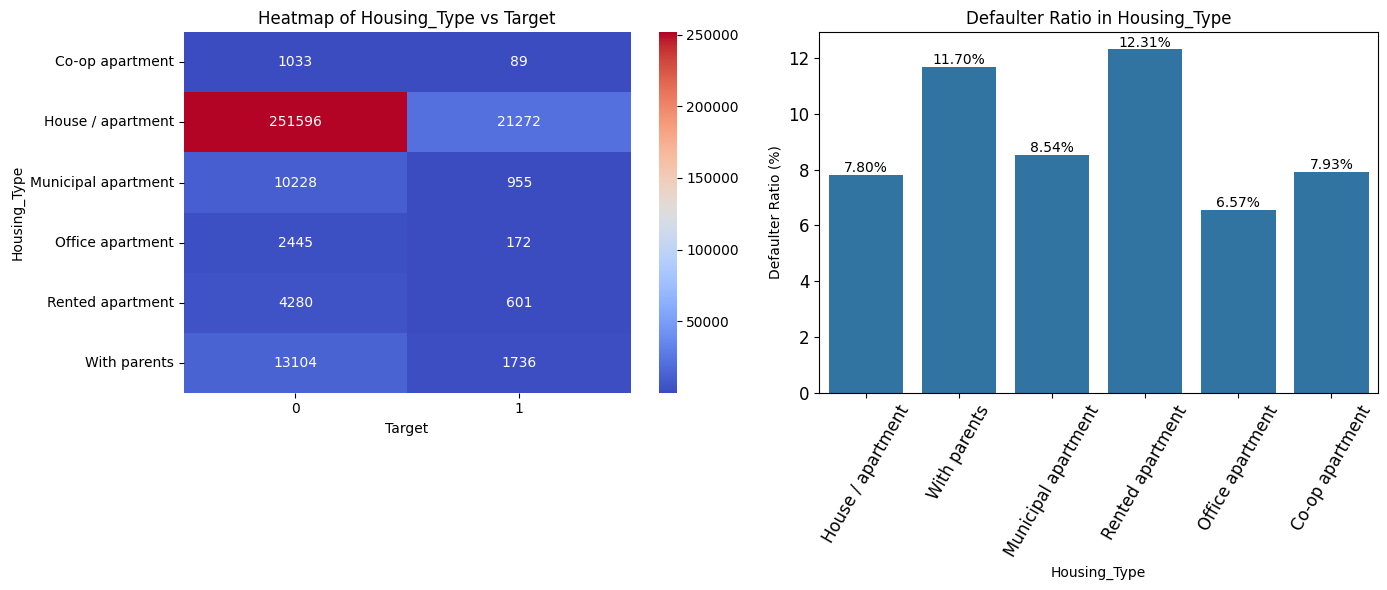

          Housing_Type  Defaulter_Ratio
0    House / apartment         7.795711
1         With parents        11.698113
2  Municipal apartment         8.539748
3     Rented apartment        12.313051
4     Office apartment         6.572411
5      Co-op apartment         7.932264


In [34]:
plot_and_print_category_analysis(df, 'Target','Housing_Type')

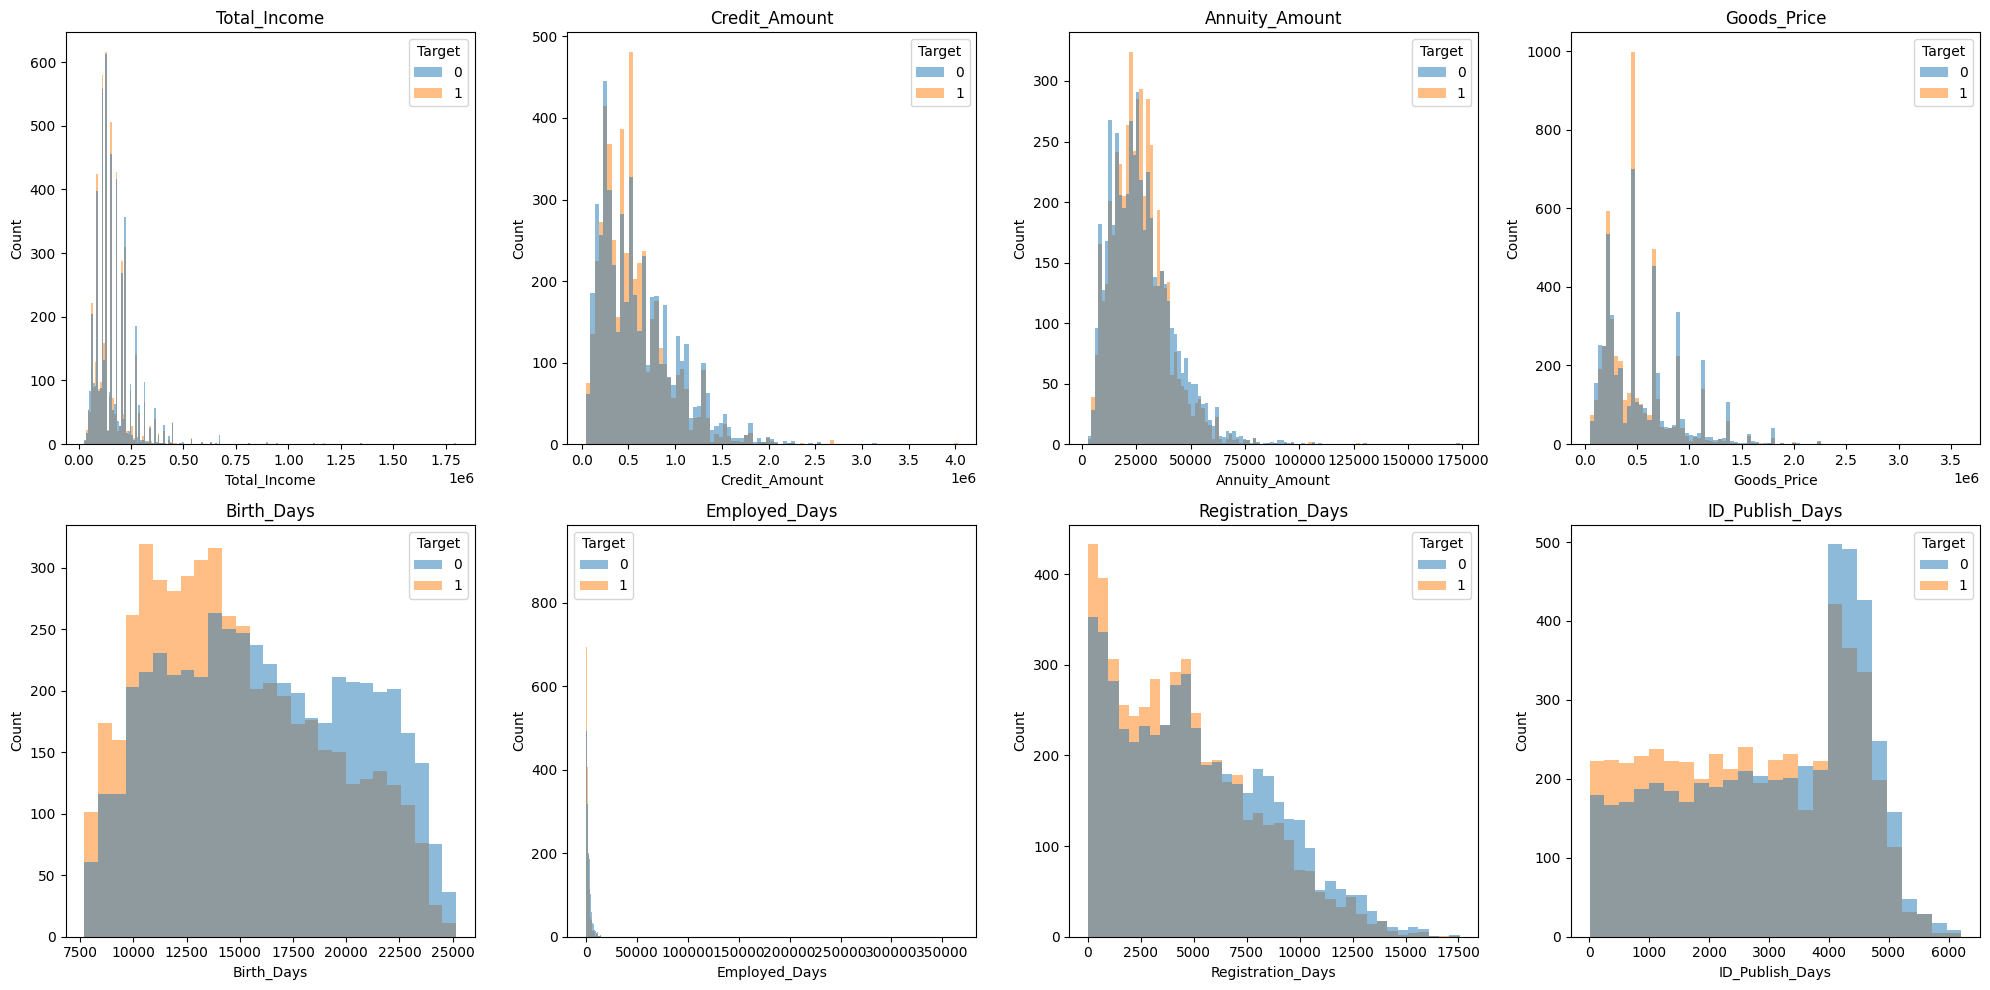

In [35]:
data = df.groupby("Target").sample(n=5000, replace=True)
columns = ['Total_Income', 'Credit_Amount', 'Annuity_Amount', 'Goods_Price', 'Birth_Days', 'Employed_Days', 'Registration_Days', 'ID_Publish_Days']

# Create the figure and axes
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Plot histograms
for col, ax in zip(columns, axes.flatten()):
    sns.histplot(data=data, x=col, hue='Target', edgecolor=None, ax=ax)
    ax.set_title(col)

plt.tight_layout()
plt.show()

## Feature Engineering

In [36]:
# Scaling numerical columns
from sklearn.preprocessing import MinMaxScaler

# Initializing the scaler with the desired feature range
scaler = MinMaxScaler(feature_range=(1, 5))
numerical_columns = df.select_dtypes(include=['number']).columns

for col in numerical_columns:
    if set(df[col].unique()) == {0, 1}:
        continue

    # Reshaped the data to a 2D array
    col_data = df[col].values.reshape(-1, 1)

    # Fiting the scaler on the column data
    scaler.fit(col_data)

    # Transformed the column data
    df[col] = scaler.transform(col_data)
df.head()

,Target,Contract_Type,Owns_Car,Owns_Realty,Children_Count,Total_Income,Credit_Amount,Annuity_Amount,Goods_Price,Companion_Type,Income_Type,Education_Level,Family_Status,Housing_Type,Region_Population,Birth_Days,Employed_Days,Registration_Days,ID_Publish_Days,Job_Type,City_Region_Rating,Family_Size,Region_Rating,Reg_Region_Not_Live_Region,Reg_Region_Not_Work_Region,Live_Region_Not_Work_Region,Reg_City_Not_Live_City,Reg_City_Not_Work_City,Live_City_Not_Work_City,Organization_Type,External_Source_2,External_Source_3,Last_Phone_Change_Days,Credit_Inquiries_Hour,Credit_Inquiries_Day,Credit_Inquiries_Week,Credit_Inquiries_Month,Credit_Inquiries_Quarter,Credit_Inquiries_Year
0,1,Cash loans,N,Y,1.0,1.006047,1.361146,1.360126,1.309764,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,2.025285,1.444645,1.006976,1.591440,2.178269,Laborers,1.000000,3.0,3.0,0,0,0,0,0,0,Business Entity Type 3,2.230169,1.620218,2.056850,1.000000,1.000000,1.000000,1.000000,1.000000,1.160000
1,0,Cash loans,N,N,1.0,1.008356,2.246944,1.531695,2.086420,Family,State servant,Higher education,Married,House / apartment,1.180066,3.091545,1.013011,1.192283,1.161734,Core staff,1.210526,1.0,1.0,0,0,0,0,0,0,School,3.911092,3.279557,1.771668,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,0,Revolving loans,Y,Y,1.0,1.001431,1.089888,1.080098,1.094276,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,1.539588,3.605862,1.002464,1.690661,2.406697,Laborers,1.000000,3.0,3.0,0,0,0,0,0,0,Government,3.600759,4.256522,1.759553,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,0,Cash loans,N,Y,1.0,1.003739,1.267348,1.437908,1.255892,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,1.428093,3.596618,1.033282,2.594196,2.354453,Laborers,1.210526,3.0,3.0,0,0,0,0,0,0,Business Entity Type 3,4.043003,3.279557,1.575023,1.006402,1.003111,1.017181,1.039614,1.004069,1.303996
4,0,Cash loans,N,Y,1.0,1.003278,1.467416,1.315900,1.471380,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,2.571520,3.805637,1.033271,1.698930,2.921912,Core staff,1.000000,3.0,3.0,0,0,0,0,1,1,Religion,2.509887,3.279557,2.030755,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
# Performing label encoding
from sklearn.preprocessing import LabelEncoder
ordinal_columns = df.select_dtypes("O").columns
encoder = LabelEncoder()

# Fiting and transforming the training data
for col in ordinal_columns:
    df[col] = encoder.fit_transform(df[col])

df.head()

,Target,Contract_Type,Owns_Car,Owns_Realty,Children_Count,Total_Income,Credit_Amount,Annuity_Amount,Goods_Price,Companion_Type,Income_Type,Education_Level,Family_Status,Housing_Type,Region_Population,Birth_Days,Employed_Days,Registration_Days,ID_Publish_Days,Job_Type,City_Region_Rating,Family_Size,Region_Rating,Reg_Region_Not_Live_Region,Reg_Region_Not_Work_Region,Live_Region_Not_Work_Region,Reg_City_Not_Live_City,Reg_City_Not_Work_City,Live_City_Not_Work_City,Organization_Type,External_Source_2,External_Source_3,Last_Phone_Change_Days,Credit_Inquiries_Hour,Credit_Inquiries_Day,Credit_Inquiries_Week,Credit_Inquiries_Month,Credit_Inquiries_Quarter,Credit_Inquiries_Year
0,1,0,0,1,1.0,1.006047,1.361146,1.360126,1.309764,6,7,4,3,1,2.025285,1.444645,1.006976,1.591440,2.178269,8,1.000000,3.0,3.0,0,0,0,0,0,0,5,2.230169,1.620218,2.056850,1.000000,1.000000,1.000000,1.000000,1.000000,1.160000
1,0,0,0,0,1.0,1.008356,2.246944,1.531695,2.086420,1,4,1,1,1,1.180066,3.091545,1.013011,1.192283,1.161734,3,1.210526,1.0,1.0,0,0,0,0,0,0,39,3.911092,3.279557,1.771668,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,0,1,1,1,1.0,1.001431,1.089888,1.080098,1.094276,6,7,4,3,1,1.539588,3.605862,1.002464,1.690661,2.406697,8,1.000000,3.0,3.0,0,0,0,0,0,0,11,3.600759,4.256522,1.759553,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,0,0,0,1,1.0,1.003739,1.267348,1.437908,1.255892,6,7,4,0,1,1.428093,3.596618,1.033282,2.594196,2.354453,8,1.210526,3.0,3.0,0,0,0,0,0,0,5,4.043003,3.279557,1.575023,1.006402,1.003111,1.017181,1.039614,1.004069,1.303996
4,0,0,0,1,1.0,1.003278,1.467416,1.315900,1.471380,6,7,4,3,1,2.571520,3.805637,1.033271,1.698930,2.921912,3,1.000000,3.0,3.0,0,0,0,0,1,1,37,2.509887,3.279557,2.030755,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
df_new = df.sample(n=10000, replace=True)

X = df_new.drop("Target",axis=1)
y = df_new['Target']

Text(0.5, 1.0, 'Distribution of Target column before balancing')

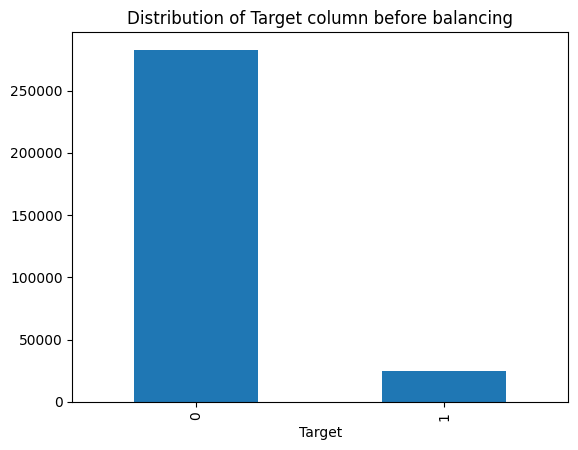

In [39]:
df["Target"].value_counts().plot(kind="bar")
plt.title("Distribution of Target column before balancing")

In [40]:
# Applying SMOTE to handle imbalanced data
from collections import Counter
from imblearn.over_sampling import SMOTE

sampler = SMOTE()
X_new, y_new = sampler.fit_resample(X, y)

# Ensuring balanced data
print("Class distribution after SMOTE:", Counter(y_new))

Class distribution after SMOTE: Counter({0: 9165, 1: 9165})


Text(0.5, 1.0, 'Distribution of Target column After balancing')

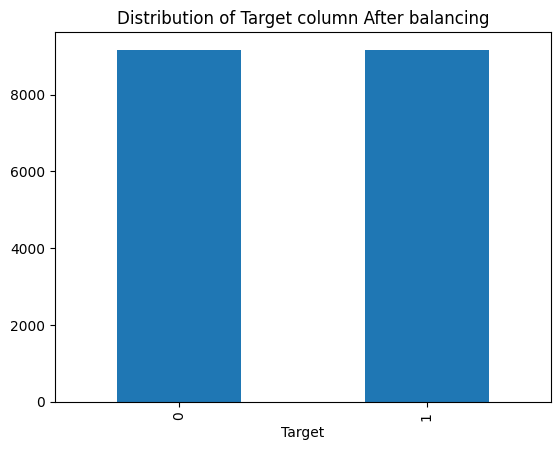

In [41]:
y_new.value_counts().plot(kind="bar")
plt.title("Distribution of Target column After balancing")

In [42]:
# Applying select k best method to select important featues
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(score_func=f_classif, k=20)
new = selector.fit_transform(X_new, y_new)
selected_columns = X_new.columns[selector.get_support(indices=True)]
print("Selected columns:", selected_columns)

Selected columns: Index(['Contract_Type', 'Owns_Car', 'Owns_Realty', 'Goods_Price',
       'Income_Type', 'Education_Level', 'Family_Status', 'Birth_Days',
       'Employed_Days', 'ID_Publish_Days', 'Family_Size', 'Region_Rating',
       'Reg_Region_Not_Work_Region', 'Live_Region_Not_Work_Region',
       'Reg_City_Not_Live_City', 'Reg_City_Not_Work_City',
       'Live_City_Not_Work_City', 'External_Source_2', 'External_Source_3',
       'Last_Phone_Change_Days'],
      dtype='object')


## Train_Test_split

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.1)

## Modeling

In [44]:
# Importing Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [45]:
# Storing functions of models in variable
models = [
    LogisticRegression(),
    RandomForestClassifier(),
    MLPClassifier(),
    KNeighborsClassifier(),
]

In [46]:
# Importing Evaluation matrces
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score

LogisticRegression
Train Score: 0.7523186033824332
Test Score: 0.7545008183306056
Accuracy: 0.7545008183306056
Precision: 0.7550678573385161
Recall: 0.7545008183306056
F1 Score: 0.7542655184056343
[[658 249]
 [201 725]]
              precision    recall  f1-score   support

           0       0.77      0.73      0.75       907
           1       0.74      0.78      0.76       926

    accuracy                           0.75      1833
   macro avg       0.76      0.75      0.75      1833
weighted avg       0.76      0.75      0.75      1833

++++++++++++++++++++++++++++++++++++++++++++++++


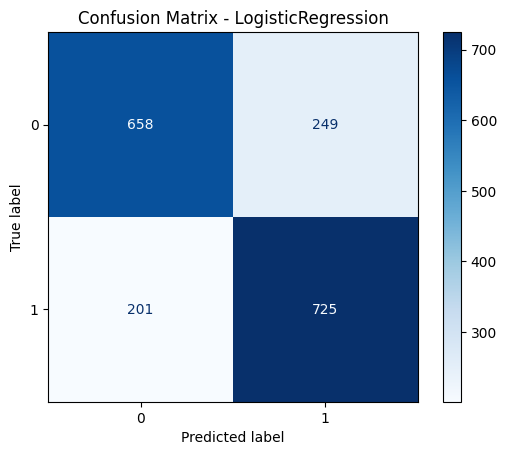

RandomForestClassifier
Train Score: 1.0
Test Score: 0.9569012547735952
Accuracy: 0.9569012547735952
Precision: 0.9590983802161468
Recall: 0.9569012547735952
F1 Score: 0.9568656766336487
[[899   8]
 [ 71 855]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       907
           1       0.99      0.92      0.96       926

    accuracy                           0.96      1833
   macro avg       0.96      0.96      0.96      1833
weighted avg       0.96      0.96      0.96      1833

++++++++++++++++++++++++++++++++++++++++++++++++


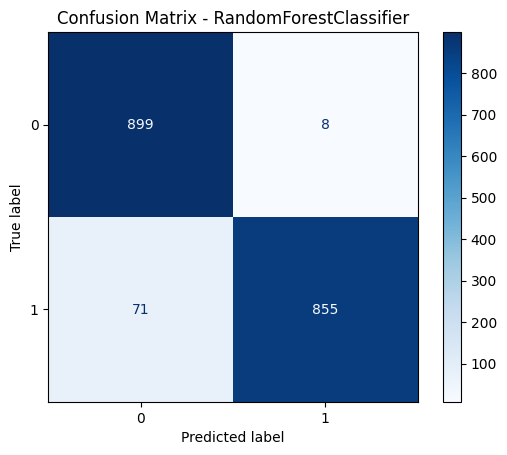

MLPClassifier
Train Score: 0.8487603806752743
Test Score: 0.8281505728314239
Accuracy: 0.8281505728314239
Precision: 0.8285356636242567
Recall: 0.8281505728314239
F1 Score: 0.82813573965771
[[764 143]
 [172 754]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       907
           1       0.84      0.81      0.83       926

    accuracy                           0.83      1833
   macro avg       0.83      0.83      0.83      1833
weighted avg       0.83      0.83      0.83      1833

++++++++++++++++++++++++++++++++++++++++++++++++


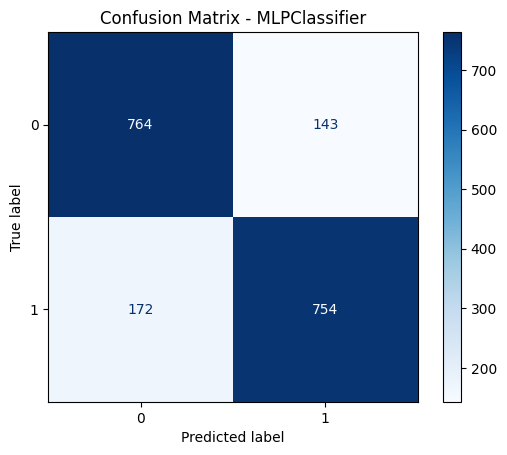

KNeighborsClassifier
Train Score: 0.8834939686003516
Test Score: 0.8434260774686306
Accuracy: 0.8434260774686306
Precision: 0.8798962414360354
Recall: 0.8434260774686306
F1 Score: 0.8392743783886023
[[621 286]
 [  1 925]]
              precision    recall  f1-score   support

           0       1.00      0.68      0.81       907
           1       0.76      1.00      0.87       926

    accuracy                           0.84      1833
   macro avg       0.88      0.84      0.84      1833
weighted avg       0.88      0.84      0.84      1833

++++++++++++++++++++++++++++++++++++++++++++++++


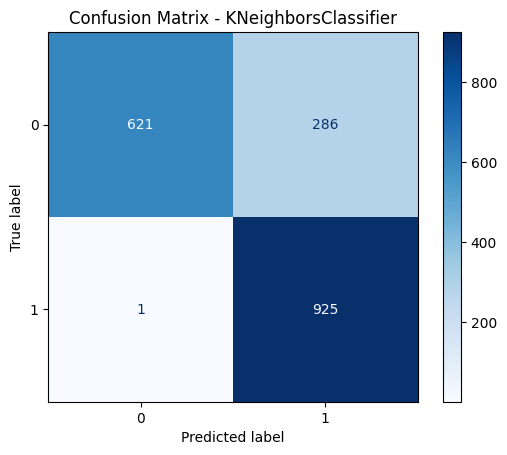

In [47]:
# Evaluation function
def evaluate_model(mdl, x_train, y_train, x_test, y_test):
    # Predicting the target values for the test set
    y_pred = mdl.predict(x_test)
    train_score = mdl.score(x_train, y_train)
    test_score = mdl.score(x_test, y_test)

    # Calculating the training score (accuracy) on the training data
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    name = type(mdl).__name__

    print(name)
    print("Train Score:", train_score)
    print("Test Score:", test_score)
    print("Accuracy:", acc)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print(conf_matrix)
    print(classification_report(y_test, y_pred))
    print("++++++++++++++++++++++++++++++++++++++++++++++++")

    # Plotting the confusion matrix as a heatmap
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

# Iterating over a list of models
for mdl in models:
    # Fitting the model to the training data
    mdl.fit(x_train, y_train)

    # Calling the evaluation function
    evaluate_model(mdl, x_train, y_train, x_test, y_test)

### Training Best Model

Fitting 2 folds for each of 18 candidates, totalling 36 fits
Best Parameters: {'bootstrap': False, 'max_features': 'log2', 'n_estimators': 400}
RandomForestClassifier
Train Score: 1.0
Test Score: 0.9618112384069831
Accuracy: 0.9618112384069831
Precision: 0.9638225159377539
Recall: 0.9618112384069831
F1 Score: 0.9617832638582002
[[902   5]
 [ 65 861]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       907
           1       0.99      0.93      0.96       926

    accuracy                           0.96      1833
   macro avg       0.96      0.96      0.96      1833
weighted avg       0.96      0.96      0.96      1833

++++++++++++++++++++++++++++++++++++++++++++++++


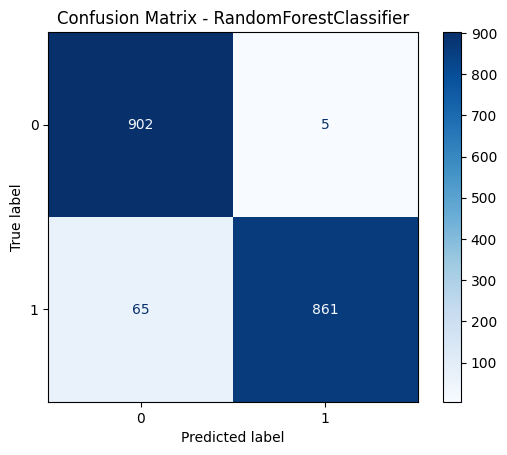

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=400, num=3)],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Performing Grid Search CV
rf_random = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=2, verbose=2, n_jobs=-1)
rf_random.fit(x_train, y_train)

# Best parameters and Model
print(f"Best Parameters: {rf_random.best_params_}")
best_rf = rf_random.best_estimator_

# Evaluate the final model
evaluate_model(best_rf, x_train, y_train, x_test, y_test)